In [154]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# 2. Load the dataset

In [155]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 3. Perform Below Visualizations

# * Univariate Analysis

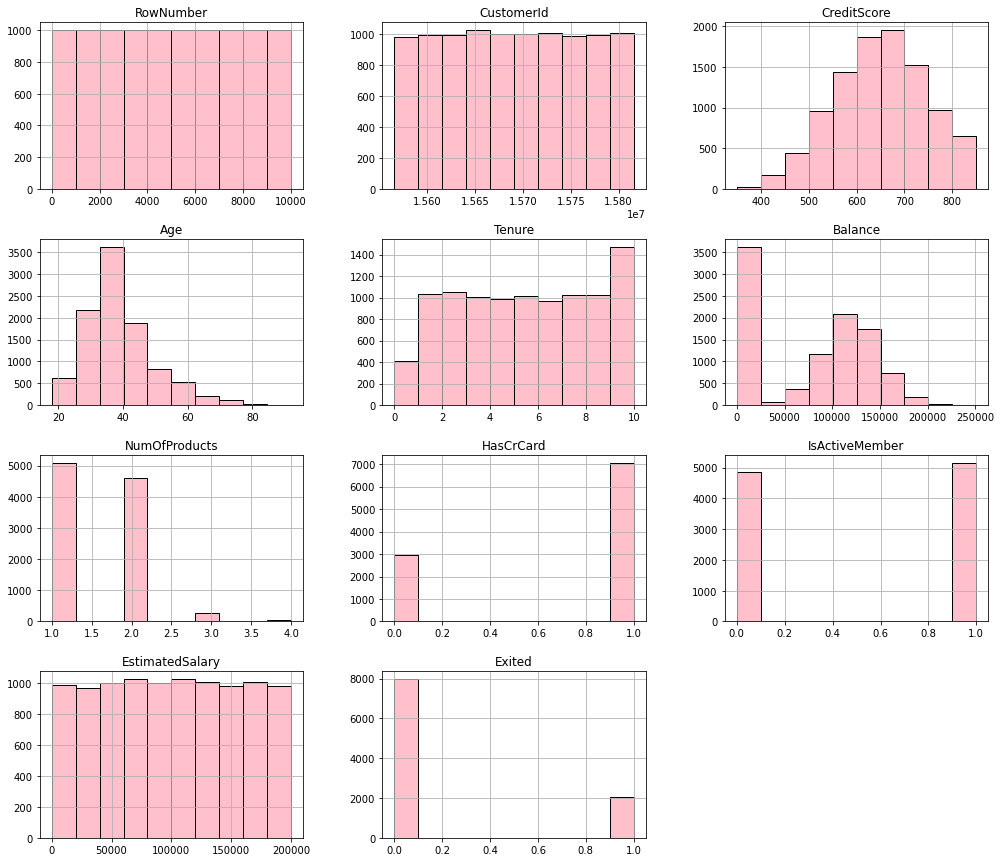

In [156]:
data.hist(figsize = (17,15),color = 'pink',edgecolor = 'black')
plt.show()

# * Bivariate Analysis

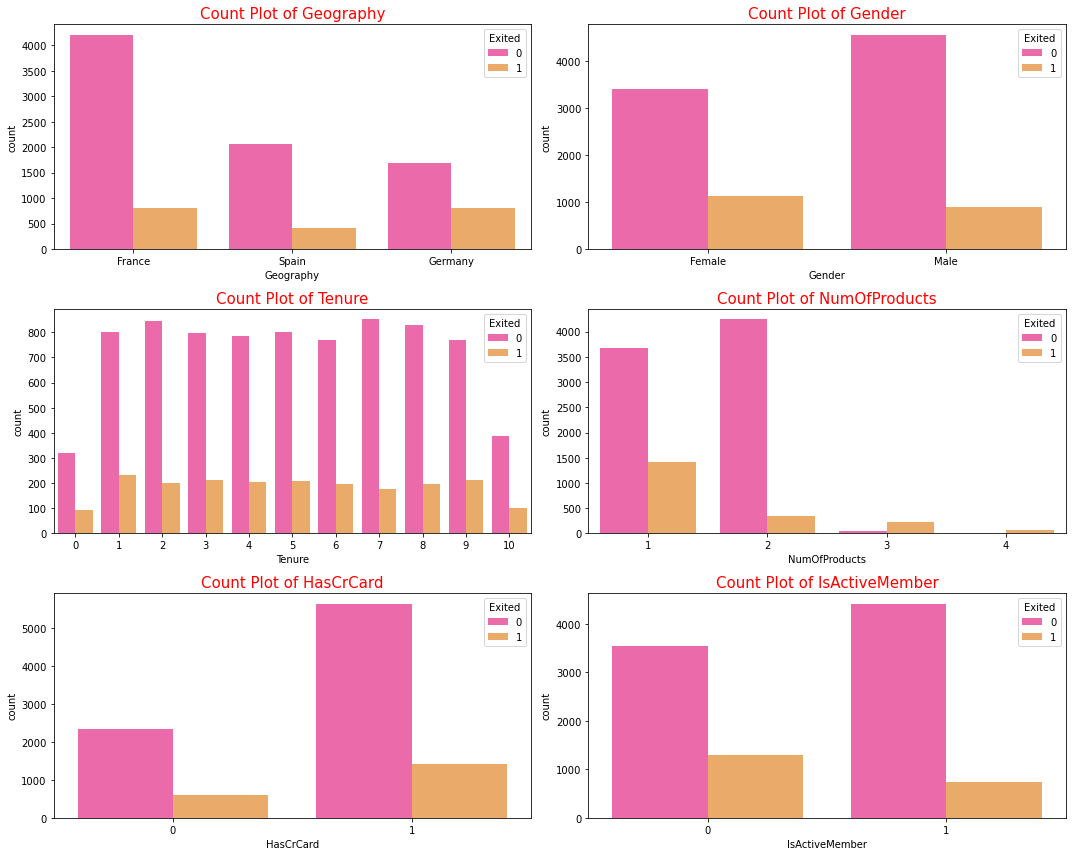

In [157]:
#visualization of categorical features
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
plt.title("Visualization")
sns.countplot('Geography', hue = 'Exited', data = data, ax = ax[0][0],palette='spring')
sns.countplot('Gender', hue = 'Exited', data = data, ax = ax[0][1],palette='spring')
sns.countplot('Tenure', hue = 'Exited', data = data, ax = ax[1][0],palette='spring')
sns.countplot('NumOfProducts', hue = 'Exited', data = data, ax = ax[1][1],palette='spring')
sns.countplot('HasCrCard', hue = 'Exited', data = data, ax = ax[2][0],palette='spring')
sns.countplot('IsActiveMember', hue = 'Exited', data = data, ax = ax[2][1],palette='spring')

ax[0][0].set_title('Count Plot of Geography',color='red',fontsize=15)
ax[0][1].set_title('Count Plot of Gender',color='red',fontsize=15)
ax[1][0].set_title('Count Plot of Tenure',color='red',fontsize=15)
ax[1][1].set_title('Count Plot of NumOfProducts',color='red',fontsize=15)
ax[2][0].set_title('Count Plot of HasCrCard',color='red',fontsize=15)
ax[2][1].set_title('Count Plot of IsActiveMember',color='red',fontsize=15)

plt.tight_layout()
plt.show()

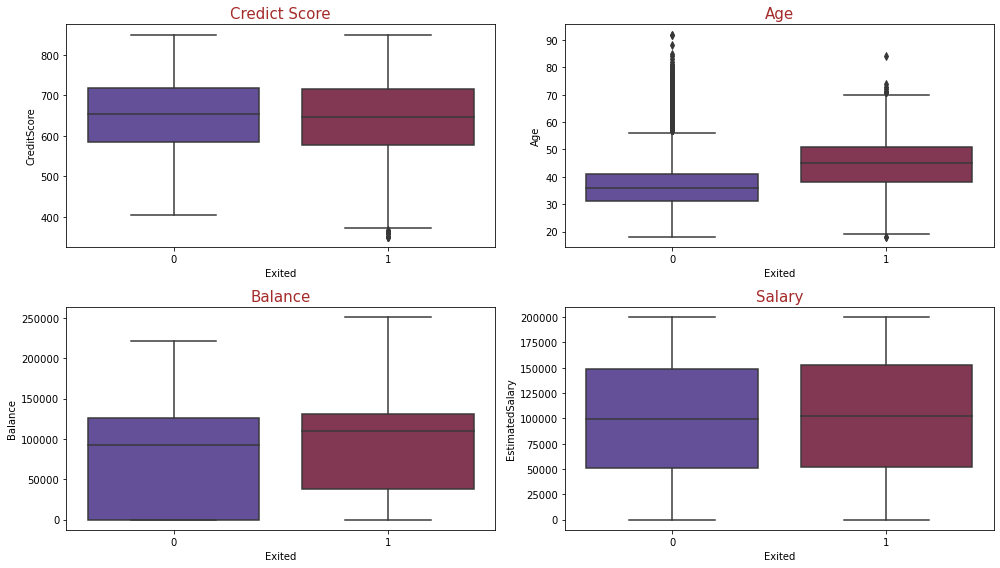

In [158]:
#visualization of Numerical features
fig, ax = plt.subplots(2, 2, figsize = (14, 8))
sns.boxplot(x = 'Exited', y = 'CreditScore', data = data, ax = ax[0][0],palette='twilight')
sns.boxplot(x = 'Exited', y = 'Age', data = data, ax = ax[0][1],palette='twilight')
sns.boxplot(x = 'Exited', y = 'Balance', data = data, ax = ax[1][0],palette='twilight')
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = data, ax = ax[1][1],palette='twilight')

ax[0][0].set_title('Credict Score',color='brown',fontsize=15)
ax[0][1].set_title('Age',color='brown',fontsize=15)
ax[1][0].set_title('Balance',color='brown',fontsize=15)
ax[1][1].set_title('Salary',color='brown',fontsize=15)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

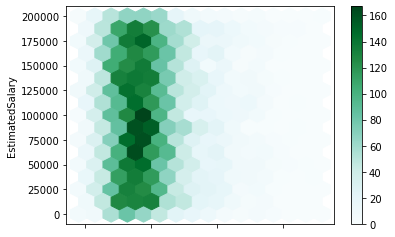

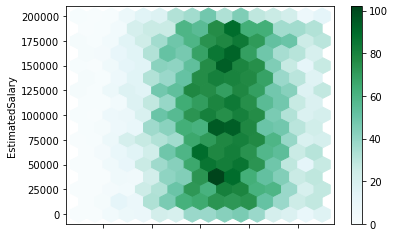

In [159]:
data.plot.hexbin(x='Age',y='EstimatedSalary',gridsize=15)
data.plot.hexbin(x='CreditScore',y='EstimatedSalary',gridsize=15)

# * Multivariate Analysis

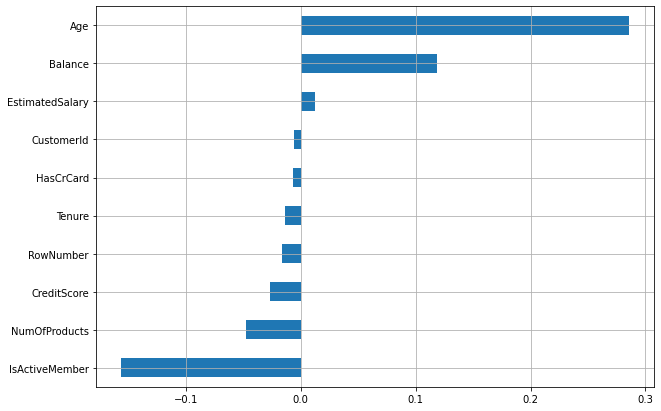

In [160]:
plt.figure(figsize=(10,7))
data.corr()['Exited'].sort_values().drop('Exited').plot(kind='barh')
plt.grid(True)
plt.show()

In [161]:
data.corr()['Exited'].sort_values().drop('Exited')

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
RowNumber         -0.016571
Tenure            -0.014001
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Name: Exited, dtype: float64

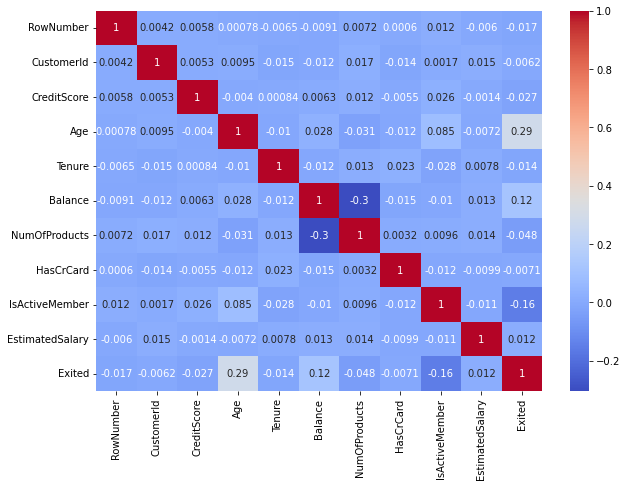

In [162]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

# 4. Perform descriptive statistics on the dataset

In [163]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# 5. Handle the Missing values.

In [164]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [165]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6. Find the outliers and replace the outliers

<AxesSubplot:xlabel='CreditScore'>

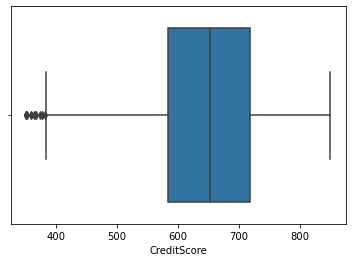

In [166]:
sns.boxplot(data['CreditScore'],data=data)

In [167]:
Q1 = np.percentile(data['CreditScore'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['CreditScore'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['CreditScore'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['CreditScore'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data['CreditScore'].shape)

Old Shape:  (10000, 14)
New Shape:  (9984,)


<AxesSubplot:xlabel='NumOfProducts'>

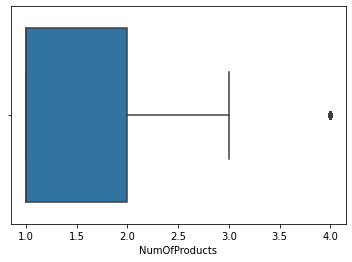

In [168]:
sns.boxplot(data['NumOfProducts'],data=data)

In [169]:
Q1 = np.percentile(data['NumOfProducts'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['NumOfProducts'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['NumOfProducts'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['NumOfProducts'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data['NumOfProducts'].shape)

Old Shape:  (9984, 14)
New Shape:  (9925,)


<AxesSubplot:xlabel='Balance'>

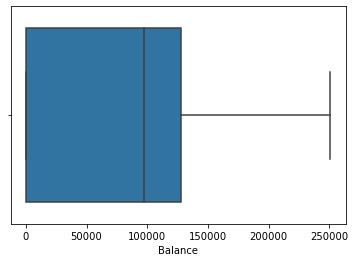

In [170]:
sns.boxplot(data['Balance'],data=data)

<AxesSubplot:xlabel='EstimatedSalary'>

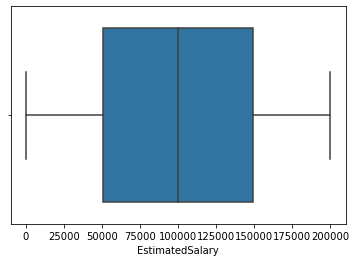

In [171]:
sns.boxplot(data['EstimatedSalary'],data=data)

# 7. Check for Categorical columns and perform encoding

In [172]:
data['Geography']=data['Geography'].map({'France':0,'Spain':1,'Germany':2})
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data = data.drop(['Surname'],axis=1)

In [173]:
data.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10,0


# 8. Splitting data into independent and dependent variables

In [174]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(x)
print(y)

      RowNumber  CustomerId  CreditScore  Geography  Gender  Age  Tenure  \
0             1    15634602          619          0       1   42       2   
1             2    15647311          608          1       1   41       1   
2             3    15619304          502          0       1   42       8   
3             4    15701354          699          0       1   39       1   
4             5    15737888          850          1       1   43       2   
...         ...         ...          ...        ...     ...  ...     ...   
9995       9996    15606229          771          0       0   39       5   
9996       9997    15569892          516          0       0   35      10   
9997       9998    15584532          709          0       1   36       7   
9998       9999    15682355          772          2       0   42       3   
9999      10000    15628319          792          0       1   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0         

# 9. Scale the independent variables

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

# 10. Split the data into training and testing

In [177]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=40)